### word_freq experimentation

In [1]:
import numpy as np
import pandas as pd
from wordfreq import word_frequency
from wordfreq import zipf_frequency
import math
from predictor import Predictor
import numpy as np

Experimentation with the zipf_frequency versus the word_frequency functions.

You can achieve similar results by setting val = 1 / rate when rate is word_frequency()

In [44]:
words = ["sweater", "the", "correct", "and", "cute", "fluffy"]

for i in words:
    rate = zipf_frequency(i, 'en')
    val = math.pow(10, 9 - rate)
    print(i, "is used approximately once per", str(val), "words in the English language")

sweater is used approximately once per 165958.6907437563 words in the English language
the is used approximately once per 18.620871366628656 words in the English language
correct is used approximately once per 16218.100973589299 words in the English language
and is used approximately once per 38.904514499428046 words in the English language
cute is used approximately once per 22387.21138568338 words in the English language
fluffy is used approximately once per 257039.57827688646 words in the English language


In [6]:
valid = np.loadtxt("valid-wordle-words.txt", dtype = str)

list = []
for i in valid:
    list.append(zipf_frequency(i, 'en'))

df = pd.DataFrame({"words": valid, "f-score": list})

### Backwards solver
Code to deceifer a guess based on the rule and solution.

In [ ]:
wordle = Predictor()
solution = "abide"
rule = wordle.parse_rule("gygyb")
for word in wordle.valid:
    compare_rule = wordle.calculate_rule(word, solution)
    if rule == compare_rule:
        print(word)

### Runtime Testing
Record how long it takes to execute wordle.get_reduction_values() for a varying length of wordle.valid

In [3]:
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

##### Generate data

Train data

In [1]:
train_x = [2, 34, 66, 98, 130, 162, 194, 226, 258, 290]
train_y = []
for i in train_x:
    setup_string = "from predictor import Predictor; wordle = Predictor(); wordle.valid = wordle.reduce_size(" + str(i) + ")"
    train_y.append(timeit.timeit(stmt='wordle.get_reduction_values(50)', setup = setup_string, number = 1))

Test data

In [4]:
test_x = [4, 36, 162, 290]
test_y = []
for i in test_x:
    setup_string = "from predictor import Predictor; wordle = Predictor(); wordle.valid = wordle.reduce_size(" + str(i) + ")"
    test_y.append(timeit.timeit(stmt='wordle.get_reduction_values(50)', setup = setup_string, number = 1))

Plot results

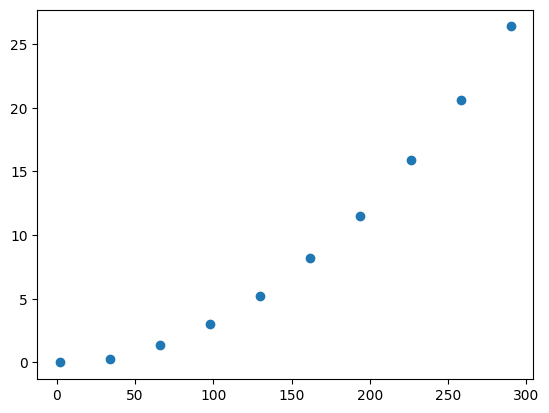

In [2]:
plt.scatter(train_x, train_y)
plt.show()

##### Perform quadratic regression
Train model:

In [6]:
preload = True
if preload:
    import_x = np.loadtxt("input/runtime-train-x.txt", dtype = float)
    import_y = np.loadtxt("input/runtime-train-y.txt", dtype = float).tolist()
else:
    import_x = test_x
    import_y = test_y

In [7]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(np.array(import_x).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, import_y)

LinearRegression()

Test model:

In [ ]:
poly_test_x = poly.fit_transform(np.array(test_x).reshape(-1, 1))
y_predicted = poly_reg_model.predict(poly_test_x)
plt.scatter(test_x, test_y)
plt.plot(test_x, y_predicted, c="red")
plt.show()

In [8]:
wordle = Predictor()
poly_test_x = poly.fit_transform(np.array([1000, len(wordle.valid)]).reshape(-1, 1))
poly_reg_model.predict(poly_test_x)

array([  315.47755831, 53292.59580136])

##### Test predictor implementation

In [16]:
wordle = Predictor()
poly = PolynomialFeatures(degree=2, include_bias=False)
test_x = [50, 100, 200]
poly_test_x = poly.fit_transform(np.array(test_x).reshape(-1, 1))
wordle.runtime_model.predict(poly_test_x)

array([ 0.73580111,  3.04484912, 12.41504768])

### Save Data (entire dataset)

##### Pre-loaded E(|v|)

In [2]:
from predictor import Predictor
wordle = Predictor()
guess = "adieu"
rule = wordle.parse_rule("bbgby")
wordle.update_valid(guess, rule)
ev = wordle.expected_valid_size(valid = True, word_freq = True)